### 4.3 수치 미분

##### 5.3.1 미분

미분: 한순간의 변화량

In [1]:
# 나쁜 구현 예

def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h)-f(x)) / h

반올림 오차문제가 발생함

해결) h의 값을 10^(-4)정도로 설정하거나 중심(중앙) 차분을 이용 

In [3]:
#개선된 예

def numerical_diff(f, x):
    h = 1e-4 # =0.0001
    return (f(x+h)-f(x-h)) / 2*h

##### 4.3.2 수치 미분의 예

In [4]:
def function_1(x):
    return 0.01*x**2+0.1*x

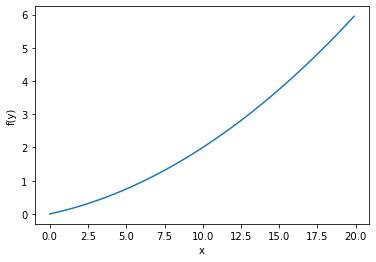

In [6]:
import numpy as np
import matplotlib.pylab as plt

x= np.arange(0.0,20.0,0.1)
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(y)")
plt.plot(x,y)
plt.show()

In [8]:
# 계산한 미분 값이 x에 대한 f(x)의 변화량

numerical_diff(function_1,5)

1.9999999999908982e-09

##### 4.3.3 편미분

변수가 여럿인 함수에 대한 미분

- 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구함
- 단 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수의 값을 고정함

In [9]:
def function_2(x):
    return x[0]**2 + x[1]**2

### 4.4 기울기

기울기: 모든 변수의 편미분을 벡터로 정리한 것

In [10]:
def numerical_gradient(f, x):
    
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열 만들기
    
    for idx in range(x.size):
        
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 복원
        
    return grad

In [11]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [12]:
# (3,4)에서의 기울기
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [13]:
# (0,2)에서의 기울기
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [14]:
# (3,0)에서의 기울기
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

(책 129p 사진 참고)**기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 줄이는 방향**

##### 4.4.1 경사법(경사 하강법)

**경사법?** 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하여 기울기를 구하고, 그 기울어진 방향으로 나아가기를 반복하면서 함수의 값을 점차 줄이는 방법

In [15]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    
    x=init_x
    
    for i in range(step_num):
        
        grad = numerical_gradient(f,x) # 기울기
        x -= lr*grad 
        
    return x

In [16]:
#문제) 경사법으로 함수 최솟값 구하기
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100) 

#거의 (0,0)에 가까운 결과

array([-6.11110793e-10,  8.14814391e-10])

##### 4.4.2 신경망 에서의 기울기

In [17]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

ModuleNotFoundError: No module named 'common'

In [ ]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

### 4.5 학습 알고리즘 구현하기

**신경망 학습의 절차**

**전제**<br>
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련데이터에 적응하도록 조성하는 과정을 '학습'이라고 함. 신경망 학습은 다음과 같이 4단계로 수행

**1단계-미니배치**<br>
훈련 데이터 중 일부를 무작위로 가져옴. 이렇게 선별한 데이터를 미니배치라 하며, 이 미니배치의 손실 함수 값을 줄이는 것이 목표임

**2단계-기울기 산출**<br>
미니배치의 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함. 기울기는 손실함수의 값을 가장 작게 하는방향을 제시

**3단계-매개변수 갱신**<br>
가중치 매개변수를 기울기 방향으로 아주 조금 갱신

**4단계=반복**<br>
1-3단계를 반복함

##### 4.5.1 2층 신경망 클래스 구현하기## 4.5.1 2층 신경망 클래스 구현하기

In [18]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


ModuleNotFoundError: No module named 'common'

### 4.6 정리

* 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
* 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
* 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
* 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
* 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
* 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
* 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 한편, 다음 장에서 구현하는 (다소 복잡한) 오차역전파법은 기울기를 고속으로 구할 수 있다.
